In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import sklearn.tree as tree
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/forestfires.csv')

In [4]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [5]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.

In [36]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor1 = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor1.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [39]:
regressor1.score(X_test, y_test)

-0.34397344448845835

In [37]:
y_pred1 = regressor1.predict(X_test)

In [38]:
mse1 = mean_squared_error(y_test, y_pred1)
mae2 = mean_absolute_error(y_test, y_pred1)

#Print the results
print('Decision Tree Regressorn:')
print('MSE:', mse1)
print('MAE:', mae2)

Decision Tree Regressorn:
MSE: 6891.797752808989
MAE: 70.58426966292134


In [43]:
regressor2 = RandomForestRegressor(n_estimators = 50, random_state = 0,max_depth=10)
regressor2.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=0)

In [44]:
y_pred2 = regressor2.predict(X_test)

In [45]:
#Calculate the MSE and MAE
mse = mean_squared_error(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
#Print the results
print('Random Forest Regression:')
print('MSE:', mse)
print('MAE:', mae)

Random Forest Regression:
MSE: 3791.9887151498683
MAE: 47.86619545308998


In [46]:
print(regressor2.score(X_train, y_train))
print(regressor2.score(X_test, y_test))

0.911027780450661
0.2605220992034848


In [6]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [7]:
from sklearn.datasets import load_iris
from sklearn import tree
Forest = load_iris()
X, y = Forest.data, Forest.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Ellipsis]

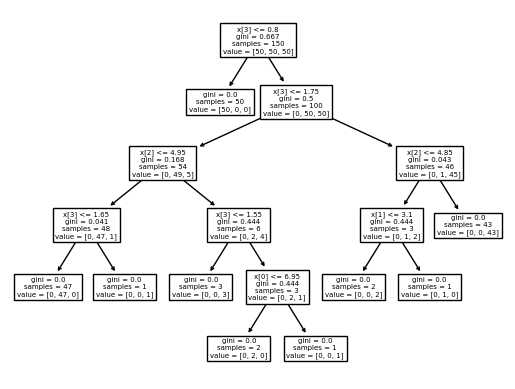

In [8]:
tree.plot_tree(clf)
[...]

RandomForestClassifier
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation. Note: This parameter is tree-specific.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
n_informative=2, n_redundant=0,
random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0,criterion="entropy")
clf.fit(X, y)
RandomForestClassifier(...)
print(clf.predict([[0, 0, 0, 0]]))

[1]


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
n_informative=2, n_redundant=0,
random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=None, random_state=0,criterion="gini")
clf.fit(X, y)
RandomForestClassifier(...)
print(clf.predict([[0, 0, 0, 0]]))

[1]


Model for training data

In [11]:
X = df.drop('area', axis=1)
Y = df['area']

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 1, 3, 5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.0


In [15]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd

sample_data = load_diabetes()

df = pd.DataFrame(
    data=sample_data.data,
    columns=sample_data.feature_names)
df['Y'] = sample_data.target

X = df.drop('Y', axis=1).values
y = df['Y'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
data = {"train": {"X": X_train, "y": y_train},
        "test": {"X": X_test, "y": y_test}}

args = {
    "alpha": 0.5
}

reg_model = Ridge(**args)
reg_model.fit(data["train"]["X"], data["train"]["y"])

preds = reg_model.predict(data["test"]["X"])
mse = mean_squared_error(preds, y_test)
metrics = {"mse": mse}
print(metrics)

model_name = "sklearn_regression_model.pkl"
joblib.dump(value='5', filename=model_name)

{'mse': 3298.8855893640457}


['sklearn_regression_model.pkl']

Random Forest

RMSE: 2.7158546312007494e+138
MAE: 2.931035646487006e+137


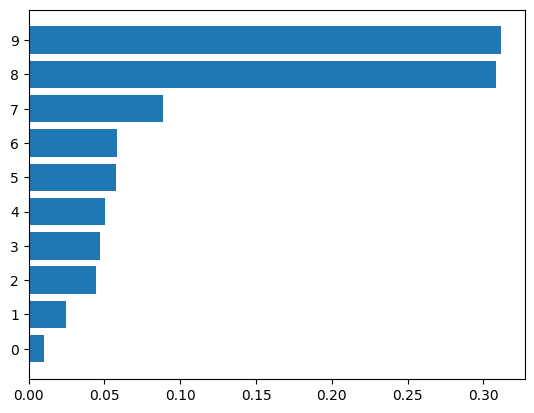

In [31]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = np.exp(rf.predict(X_test)) - 1
rmse = mean_squared_error(np.exp(y_test)-1, y_pred,squared=False)
mae = mean_absolute_error(np.exp(y_test)-1, y_pred)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Feature importance ----------------
importance = rf.feature_importances_
indices = np.argsort(importance)
fig, ax = plt.subplots()
ax.barh(range(len(importance)), importance[indices])
ax.set_yticks(range(len(importance)))


In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [52]:
clf1 = RandomizedSearchCV(RandomForestRegressor(), {
    'n_estimators': [10,20,30],
    'max_depth': [1,2,4,6,7,8,9,10],
}, cv=5, return_train_score=False)
clf1.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [1, 2, 4, 6, 7, 8, 9, 10],
                                        'n_estimators': [10, 20, 30]})

In [53]:
clf1.best_params_

{'n_estimators': 10, 'max_depth': 4}

In [54]:
clf1.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [57]:
a = int(input("What is the code of the Area?"))

What is the code of the Area?45


In [58]:
b = int(input("What is the temperature??"))
f = int(input("How many Fire Place?"))
c = int(input("Is there wind?"))
e = int(input("Are there rainy winds??"))


What is the temperature??4
How many Fire Place?45
Is there wind?4
Are there rainy winds??4


In [62]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
